### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
veh_df=pd.read_csv('vehicle.csv')

In [2]:
veh_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [3]:
veh_df.dropna(axis=1,inplace=True)

In [4]:
veh_df

,compactness,max.length_aspect_ratio,max.length_rectangularity,hollows_ratio,class
0,95,10,159,197,van
1,91,9,143,199,van
2,104,10,158,196,car
3,93,9,143,207,van
4,85,52,144,183,bus
5,107,6,169,183,bus
6,97,6,143,204,bus
7,90,9,146,202,van
8,86,7,127,208,van
9,93,11,146,204,car


In [5]:
veh_df.shape

(846, 5)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [6]:
veh_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [7]:
import seaborn as sns
sns.countplot(veh_df['class'])

### Check for any missing values in the data 

In [8]:
veh_df.isnull().sum()

compactness                  0
max.length_aspect_ratio      0
max.length_rectangularity    0
hollows_ratio                0
class                        0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [9]:
veh_df.shape

(846, 5)

In [10]:
from scipy.stats import zscore

veh_df_attr = veh_df.loc[:, 'compactness':'hollows_ratio']
veh_df_attr_z = veh_df_attr.apply(zscore)
veh_df_attr_z

,compactness,max.length_aspect_ratio,max.length_rectangularity,hollows_ratio
0,0.160580,0.311542,0.758332,0.183957
1,-0.325470,0.094079,-0.344578,0.452977
2,1.254193,0.311542,0.689401,0.049447
3,-0.082445,0.094079,-0.344578,1.529056
4,-1.054545,9.444962,-0.275646,-1.699181
5,1.618730,-0.558308,1.447652,-1.699181
6,0.403605,-0.558308,-0.344578,1.125526
7,-0.446982,0.094079,-0.137782,0.856507
8,-0.933032,-0.340845,-1.447489,1.663566
9,-0.082445,0.529004,-0.137782,1.125526


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [11]:
from sklearn.cluster import KMeans
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [12]:
cluster_errors=[]
for no_of_clusters in range(1,11):
    cluster = KMeans( n_clusters = no_of_clusters, random_state = 2354 )
    cluster.fit(veh_df_attr_z)
    cluster_errors.append(cluster.inertia_)
    print(cluster_errors)

[3384.0]
[3384.0, 2216.753557567584]
[3384.0, 2216.753557567584, 1608.2337651600806]
[3384.0, 2216.753557567584, 1608.2337651600806, 1066.7823436776548]
[3384.0, 2216.753557567584, 1608.2337651600806, 1066.7823436776548, 902.6130052521376]
[3384.0, 2216.753557567584, 1608.2337651600806, 1066.7823436776548, 902.6130052521376, 760.5245748383466]
[3384.0, 2216.753557567584, 1608.2337651600806, 1066.7823436776548, 902.6130052521376, 760.5245748383466, 679.4729389993697]
[3384.0, 2216.753557567584, 1608.2337651600806, 1066.7823436776548, 902.6130052521376, 760.5245748383466, 679.4729389993697, 613.5208986105747]
[3384.0, 2216.753557567584, 1608.2337651600806, 1066.7823436776548, 902.6130052521376, 760.5245748383466, 679.4729389993697, 613.5208986105747, 557.438074683914]
[3384.0, 2216.753557567584, 1608.2337651600806, 1066.7823436776548, 902.6130052521376, 760.5245748383466, 679.4729389993697, 613.5208986105747, 557.438074683914, 503.5188861674391]


In [13]:
import numpy as np
cluster_no = np.arange(1,11)
clusters_df = pd.DataFrame( { "num_clusters":cluster_no, "cluster_errors": cluster_errors} )
clusters_df

,num_clusters,cluster_errors
0,1,3384.000000
1,2,2216.753558
2,3,1608.233765
3,4,1066.782344
4,5,902.613005
5,6,760.524575
6,7,679.472939
7,8,613.520899
8,9,557.438075
9,10,503.518886


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

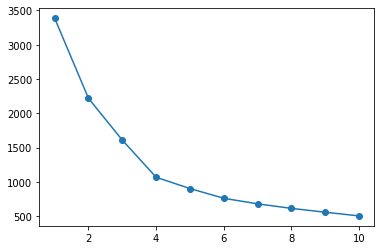

In [14]:
import matplotlib.pyplot as plt
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')

### Find out the optimal value of K

As per the graph the optimal value seems to between 2 to 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [15]:
kmeans = KMeans( n_clusters = 4, random_state = 2354 )
kmeans.fit(veh_df_attr_z)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(veh_df_attr_z) )
centroid_df

,compactness,max.length_aspect_ratio,max.length_rectangularity,hollows_ratio
0,1.082851,0.254438,1.151344,0.125412
1,-0.986354,-0.389476,-0.664224,-1.149790
2,-0.735574,8.846940,0.275809,-0.438151
3,-0.190038,-0.152333,-0.510399,0.746567


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [16]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(veh_df_attr_z) )
centroid_df

,compactness,max.length_aspect_ratio,max.length_rectangularity,hollows_ratio
0,1.082851,0.254438,1.151344,0.125412
1,-0.986354,-0.389476,-0.664224,-1.149790
2,-0.735574,8.846940,0.275809,-0.438151
3,-0.190038,-0.152333,-0.510399,0.746567


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [17]:
labels = kmeans.labels_

In [18]:
veh_df_attr_z["Group"] = labels
veh_df_attr_z.head()

,compactness,max.length_aspect_ratio,max.length_rectangularity,hollows_ratio,Group
0,0.160580,0.311542,0.758332,0.183957,0
1,-0.325470,0.094079,-0.344578,0.452977,3
2,1.254193,0.311542,0.689401,0.049447,0
3,-0.082445,0.094079,-0.344578,1.529056,3
4,-1.054545,9.444962,-0.275646,-1.699181,2


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [19]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [20]:
ABC=np.concatenate((a,b,c),axis=0)

In [21]:
ABC=pd.DataFrame(ABC,columns=list('AB'))

ABC.head()

,A,B
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

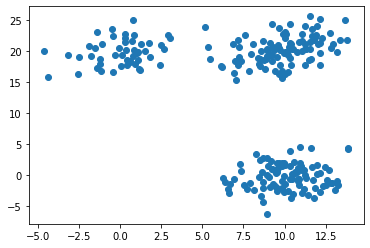

In [22]:
plt.scatter(ABC.A,ABC.B)

### 11. Find out the linkage matrix

In [23]:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

SyntaxError: invalid syntax (<ipython-input-23-09e314b47c45>, line 1)

Use ward as linkage metric and distance as Eucledian

In [24]:
from scipy.stats import zscore
ABC_z = ABC.apply(zscore)


In [25]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

### 12. Plot the dendrogram for the consolidated dataframe

In [26]:
A = linkage(ABC_z, 'ward')
c, coph_dists = cophenet(A, pdist(ABC_z))

c

0.864721309636431

In [27]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
model.fit(ABC_z)

ABC_z['labels'] = model.labels_
ABC_z.groupby(["labels"]).count()

,A,B
labels,,
0,100,100
1,67,67
2,49,49
3,34,34


In [ ]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(A, leaf_rotation=90.,color_threshold=800,  leaf_font_size=10. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

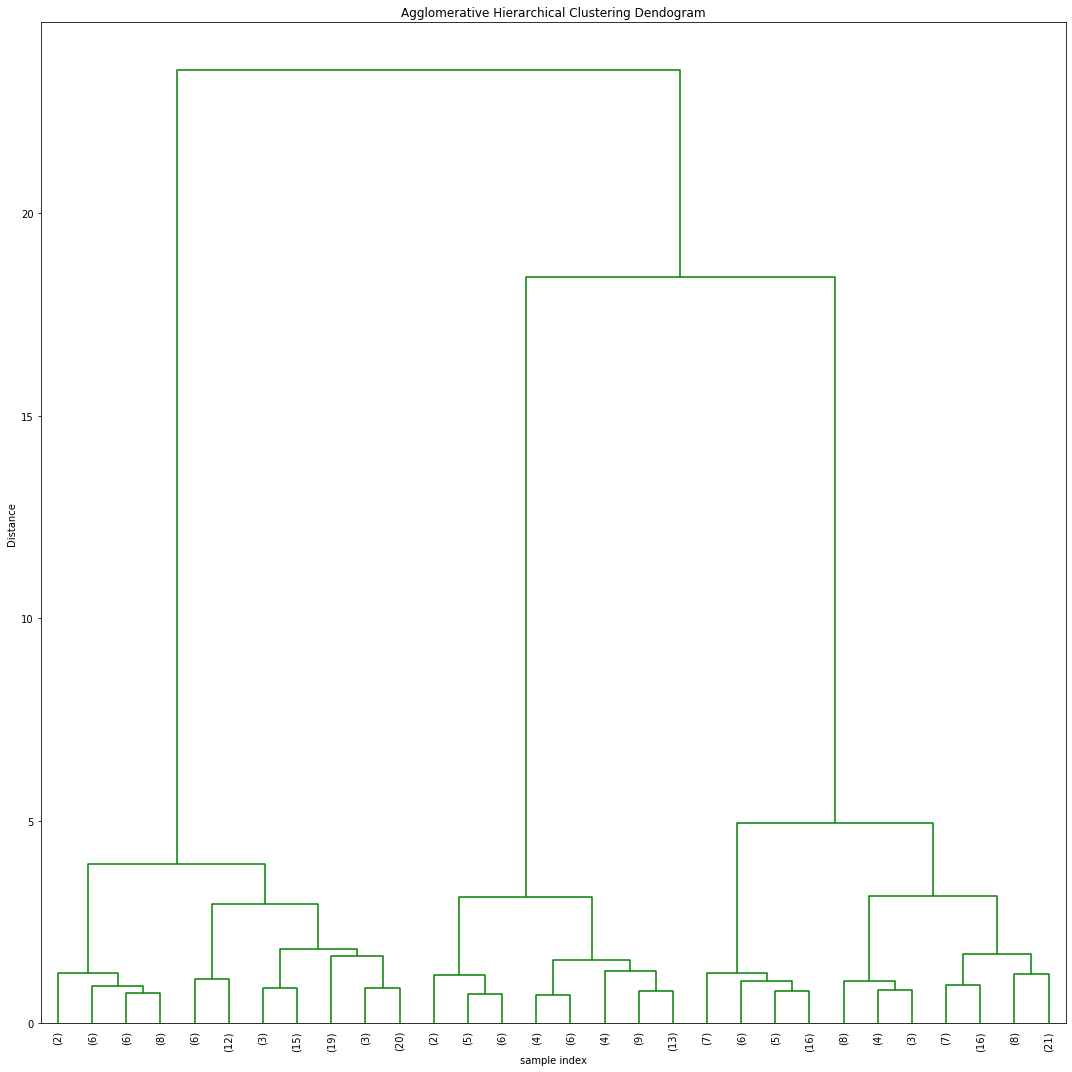

In [208]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(A, leaf_rotation=90.,color_threshold=800,  leaf_font_size=10,truncate_mode='lastp' )
plt.tight_layout()